# Pertemuan 6

# Library

In [118]:

import numpy as np
import pandas as pd

# matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# standarscaler untuk preprosing restandar data
from sklearn.preprocessing import StandardScaler

# modeling hirarki clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# metrics untuk evaluasi
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Load Data

In [119]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   npm                      372 non-null    int64  
 1   activeness_score         372 non-null    int64  
 2   assignment_score         364 non-null    float64
 3   pre_test_score           336 non-null    float64
 4   post_test_score          363 non-null    float64
 5   midterm_test_score       361 non-null    float64
 6   end_semester_test_score  372 non-null    int64  
 7   pass_test                372 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 23.4+ KB


In [121]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
npm,372.0,2.022041e+09,107.531391,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09
activeness_score,372.0,9.275806e+01,44.578778,-9.600000e+01,8.500000e+01,9.000000e+01,9.500000e+01,6.660000e+02
assignment_score,364.0,8.532967e+01,8.626380,7.000000e+01,7.900000e+01,8.500000e+01,9.200000e+01,1.000000e+02
pre_test_score,336.0,5.798810e+01,26.472625,1.000000e+01,3.500000e+01,6.150000e+01,8.100000e+01,1.000000e+02
post_test_score,363.0,5.279890e+01,25.691020,1.000000e+01,3.200000e+01,5.100000e+01,7.400000e+01,1.000000e+02
midterm_test_score,361.0,5.339889e+01,24.968789,1.000000e+01,3.200000e+01,5.300000e+01,7.300000e+01,1.000000e+02
end_semester_test_score,372.0,5.333065e+01,30.695107,-9.700000e+01,3.100000e+01,5.250000e+01,7.900000e+01,1.000000e+02


In [122]:
df.isna().sum()

npm                         0
activeness_score            0
assignment_score            8
pre_test_score             36
post_test_score             9
midterm_test_score         11
end_semester_test_score     0
pass_test                   0
dtype: int64

# Preprocessing

In [123]:
df.loc[df["activeness_score"]<0, "activeness_score"] = np.nan
df.loc[df["activeness_score"]>100, "activeness_score"] = np.nan


In [124]:
df["activeness_score"].fillna(value=df["activeness_score"].mean(), inplace=True)
df["assignment_score"].fillna(value=df["assignment_score"].mean(), inplace=True)
df["pre_test_score"].fillna(value=df["pre_test_score"].mean(), inplace=True)
df["post_test_score"].fillna(value=df["post_test_score"].mean(), inplace=True)
df["midterm_test_score"].fillna(value=df["midterm_test_score"].mean(), inplace=True)

In [125]:
df_clean = df.drop(['npm', 'pass_test'], axis=1)

In [126]:
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_clean)

# Modeling
Modeling/Traning data menggunakan algoritma hierarchical clustering

In [127]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

In [128]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram(clusters, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');

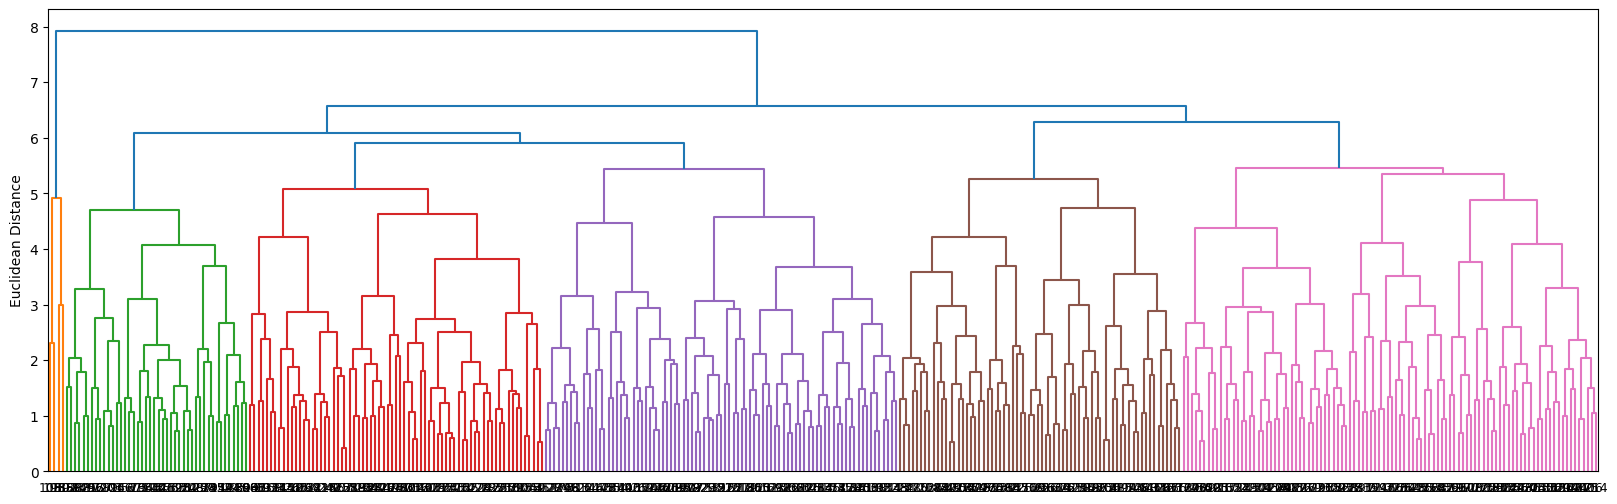

In [129]:
plot_dendrogram(complete_clustering)

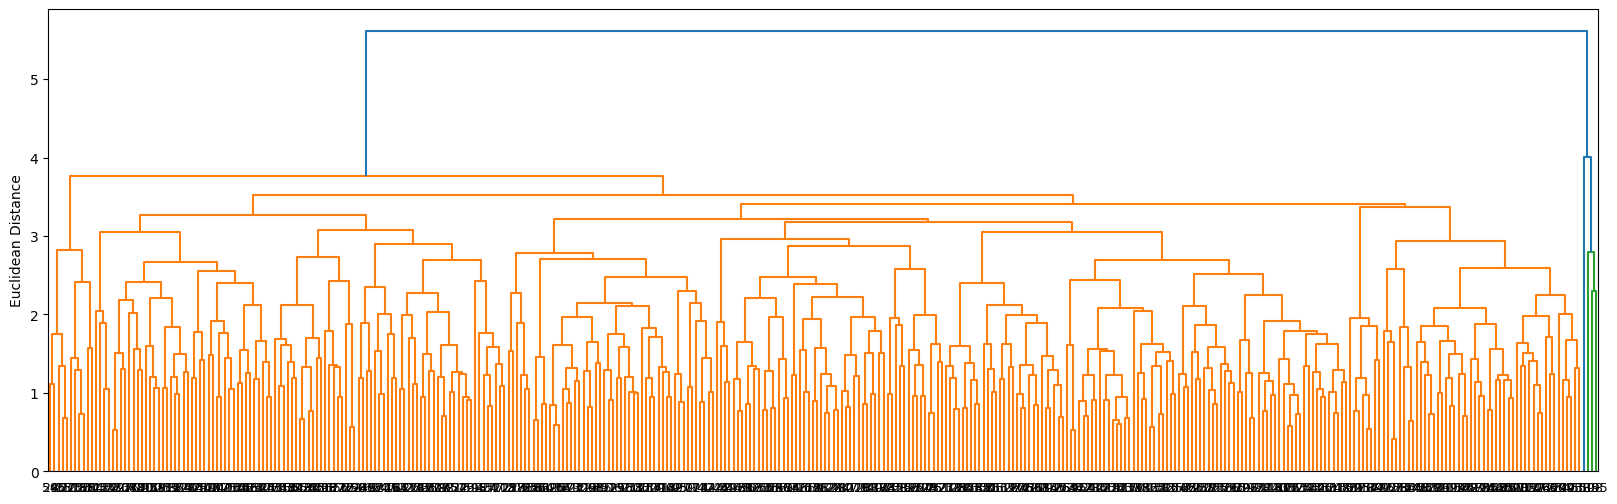

In [130]:
plot_dendrogram(average_clustering)

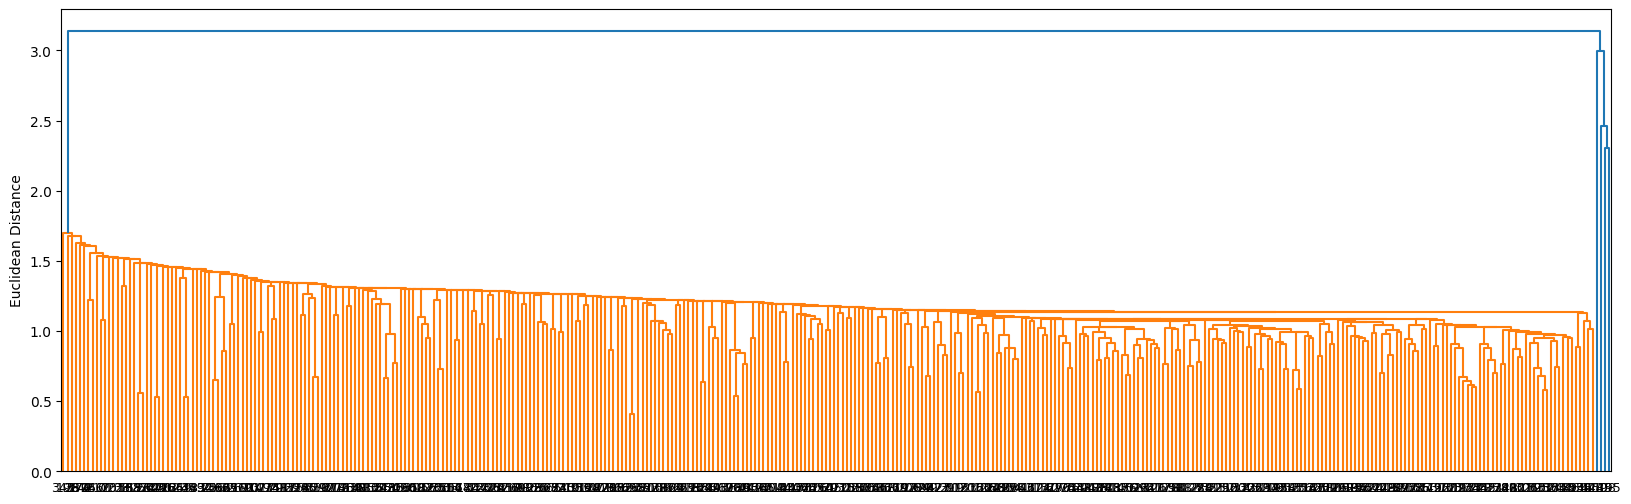

In [131]:
plot_dendrogram(single_clustering)

In [132]:
model = AgglomerativeClustering(n_clusters=2, metric="euclidean").fit(df_clean)
label = model.labels_

# Evaluation
evalution hasil data clustering menggunakan beberapa metric

In [133]:
Z = df_clean.copy()

In [134]:
ss = silhouette_score(Z, label)
print(f"Silhouette score yang didapat adalah: {ss}")

Silhouette score yang didapat adalah: 0.1472906100582593


In [135]:
sc = calinski_harabasz_score(Z,label)
print(f"Calonski harabasz score yang didapat adalah: {sc}")

Calonski harabasz score yang didapat adalah: 64.32213986808439


In [136]:
sd = davies_bouldin_score(Z, label)
print(f"Davies Bouldin score yang didapat adalah: {sd}")

Davies Bouldin score yang didapat adalah: 2.269267831996057


# Tugas

Buat visualisasi clustering

Actual cluster didapat dari kolom pass_test (not pass = 0, selain itu 1)
predicted_cluster didapat dari labeling hasil pemodelan agglomerative clustering

# Preprocessing

In [137]:
df['actual_cluster'] = df['pass_test'] = df['pass_test'].replace('not pass', 0)
df['actual_cluster'] = df['pass_test'] = df['pass_test'].replace('pass', 1)

# Modeling

In [138]:
clustering = AgglomerativeClustering(n_clusters=2).fit(df)


df = df.drop(['npm', 'pass_test'], axis=1)



In [139]:
df['predicted_cluster'] = clustering.labels_
df.head()

,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,actual_cluster,predicted_cluster
0,99.0,71.0,93.000000,52.000000,44.0,24,0,0
1,96.0,77.0,57.988095,27.000000,100.0,89,1,0
2,86.0,71.0,84.000000,17.000000,21.0,41,0,0
3,81.0,96.0,57.988095,52.798898,11.0,99,0,0
4,93.0,85.0,68.000000,29.000000,44.0,50,0,0


# Actual Cluster

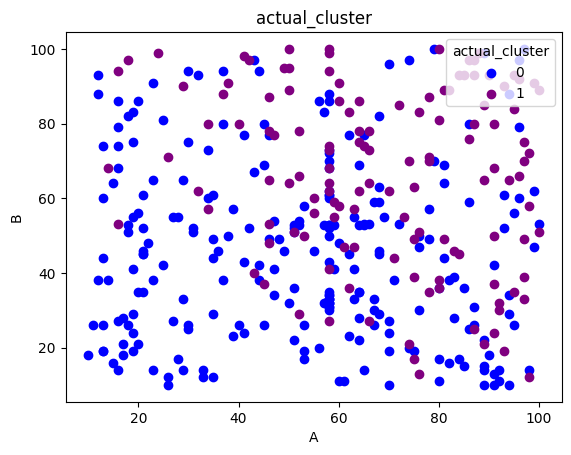

In [140]:
plt.scatter(df['pre_test_score'][df['actual_cluster'] == 0], df['post_test_score'][df['actual_cluster'] == 0], color='blue', label='not pass')
plt.scatter(df['pre_test_score'][df['actual_cluster'] == 1], df['post_test_score'][df['actual_cluster'] == 1], color='purple', label='pass')


plt.title('actual_cluster')


plt.xlabel('A')
plt.ylabel('B')

plt.legend(title="actual_cluster", labels = ['0', '1'], loc='upper right')




In [141]:
plt.show()

# Predicted Cluster

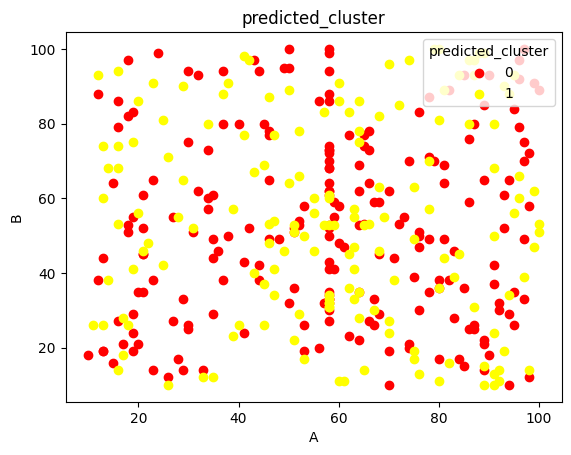

In [142]:
plt.scatter(df['pre_test_score'][df['predicted_cluster'] == 0], df['post_test_score'][df['predicted_cluster'] == 0], color='red', label='Cluster 0')
plt.scatter(df['pre_test_score'][df['predicted_cluster'] == 1], df['post_test_score'][df['predicted_cluster'] == 1], color='yellow', label='Cluster 1')


plt.title('predicted_cluster')


plt.xlabel('A')
plt.ylabel('B')


plt.legend(title="predicted_cluster", labels = ['0', '1'], loc='upper right')


plt.show()